# import some important libraries  
numpy ,pandas ,matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read and show the Data

In [2]:
data=pd.read_csv("assignment1_dataset.csv")
df=pd.DataFrame(data)
print (df.to_string())

    customer_number    profit
0            6.1101  17.59200
1            5.5277   9.13020
2            8.5186  13.66200
3            7.0032  11.85400
4            5.8598   6.82330
5            8.3829  11.88600
6            7.4764   4.34830
7            8.5781  12.00000
8            6.4862   6.59870
9            5.0546   3.81660
10           5.7107   3.25220
11          14.1640  15.50500
12           5.7340   3.15510
13           8.4084   7.22580
14           5.6407   0.71618
15           5.3794   3.51290
16           6.3654   5.30480
17           5.1301   0.56077
18           6.4296   3.65180
19           7.0708   5.38930
20           6.1891   3.13860
21          20.2700  21.76700
22           5.4901   4.26300
23           6.3261   5.18750
24           5.5649   3.08250
25          18.9450  22.63800
26          12.8280  13.50100
27          10.9570   7.04670
28          13.1760  14.69200
29          22.2030  24.14700
30           5.2524  -1.22000
31           6.5894   5.99660
32        

# Data Representation
Scatter plot show the relation between the number of the restaurant's customers and the profit of the restaurant.


The plot shows that : 1) the most of the data values ranged between 5 to 10 .

                2) the profit is directly proportional to the number of customers.

Text(0, 0.5, 'profit')

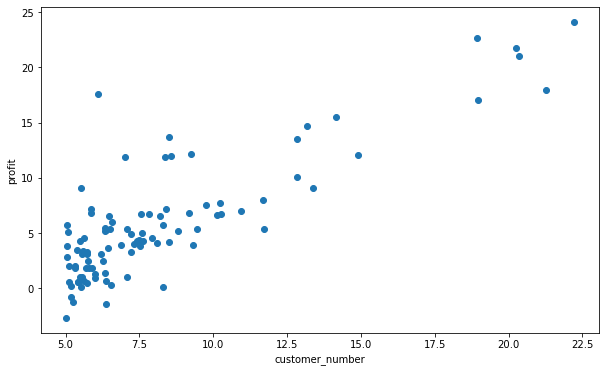

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(df['customer_number'],df["profit"])
plt.xlabel("customer_number")
plt.ylabel("profit")


In [4]:
# Assign iteration number and  alpha
iterations = 1500
alpha = 0.01

In [5]:
# Split customer_number and profit into X and y
X_df = pd.DataFrame(data["customer_number"])
y_df = pd.DataFrame(data["profit"])

In [6]:
## Add a columns of 1s as intercept to X(2D)
X_df['intercept'] = 1


In [7]:
## Transform to Numpy arrays for easier matrix math and start thetas at 0
x = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([0, 0])


# Plotting the first fit line at zero thetas

Text(0, 0.5, 'Profit')

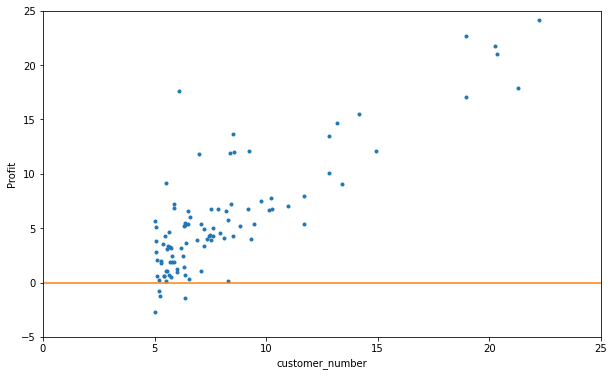

In [8]:
best_fit_x = np.linspace(0, 25, 20)        #generate numbers for x values
best_fit_y = [0 + 0*x for x in best_fit_x] #substitute in the equation y=Θ1*x+Θ0

X_df=X_df.drop(["intercept"], axis=1)
plt.figure(figsize=(10,6))
plt.plot(X_df, y_df, '.') #plot the data
plt.plot(best_fit_x, best_fit_y, '-') #plot y=0*x+0
plt.axis([0,25,-5,25])
plt.xlabel("customer_number")
plt.ylabel("Profit")


In [9]:
## Add a columns of 1s as intercept to X(2D)
X_df['intercept'] = 1


# Create computeCost function
 function called computeCost(x, y, theta)    which return the cost of given thetas (j(Θ))
<img src="cost.png">

In [10]:
def computeCost(x, y, theta):
    
    ## number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum((x.dot(theta)-y)**2)/2/m

    return J

In [11]:
#computeCost at initial theta (zeros) 
computeCost(x, y, theta)

32.072733877455676

# Create gradient_descent function
function called gradient_descent(x, y, theta) which  return the thetas of the final fitting after irretrations ,cost history and thetas history
 <img src="1_GD.png">


In [19]:
def gradient_descent(x, y, theta, alpha, iterations):
  
    J_history = [0] * iterations             #list for keep track of each cost update in a variable called J_history
    theta_history = [0] * iterations         # keep track of the theta values in each irretration

    ## number of training examples
    m = len(y)
    
    for i in range(iterations):
        
        yhat = x.dot(theta)
        loss = yhat-y
        gradient = np.transpose(x).dot(loss)/m
        theta = theta - alpha*gradient
        
        theta_history[i] = theta   
        cost = computeCost(x, y, theta)
        J_history[i] = cost  
          
    return theta, J_history, theta_history
     

# Iterations DataFrame
keep track of the thetas and the output cost


In [20]:
(thetas, J_history, theta_history) = gradient_descent(x,y,theta,alpha, iterations)
thetas

array([ 1.16636235, -3.63029144])

In [ ]:
# represent the iteration thetas and cost
t=pd.DataFrame(theta_history)
j=pd.DataFrame(J_history)
t.columns = ['Θ1', 'Θ0']
j.columns = ['cost']
df_row = pd.concat([t, j], axis=1)
print(df_row.to_string())

# Plot the regression line fit   

In [ ]:
#drop the ones line for plotting
X_df=X_df.drop(["intercept"], axis=1)

In [ ]:
#Plotting the best fit line
best_fit_x = np.linspace(0, 25, 20)      #generate numbers for x values
best_fit_y = [thetas[1] + thetas[0]*x for x in best_fit_x]      #substitute in the equation y=Θ1*x+Θ0 (y=1.16x-3.63)


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(X_df, y_df, '.')    #plot the data
plt.plot(best_fit_x, best_fit_y, '-')     #plot y=0*x+0
plt.axis([0,25,-5,25])
plt.xlabel("customer_number")
plt.ylabel("Profit")


# Plot the cost in each iteration (J_history)

In [ ]:
#The cost decreases by each iteration by weight updates (decsreased function)
plt.figure(figsize=(10,6))
n=np.arange(0, 1500,1)
plt.plot(n,J_history)
plt.xlabel("Num iter")
plt.ylabel("cost")

# Profit Estimation

In [ ]:
#y=Θ1*x+Θ0*1
#y=1.16x-3.63
print("profit when customres is 35000 =",np.array([35000, 1]).dot(thetas))
print("profit when customres is 70000 =", np.array([70000, 1]).dot(thetas))